# Components

In [1]:
import pandas as pd
import numpy as np
import csv
import json
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
reader = csv.reader(open("components/undefined-components.csv"))
next(reader, None)
undefined_components = {}
for row in reader: undefined_components[row[0]] = row[1] 

error processes/decidim-vic_diba_cat__merma2020.json
error processes/participation_u-bordeaux_fr__bpe.json


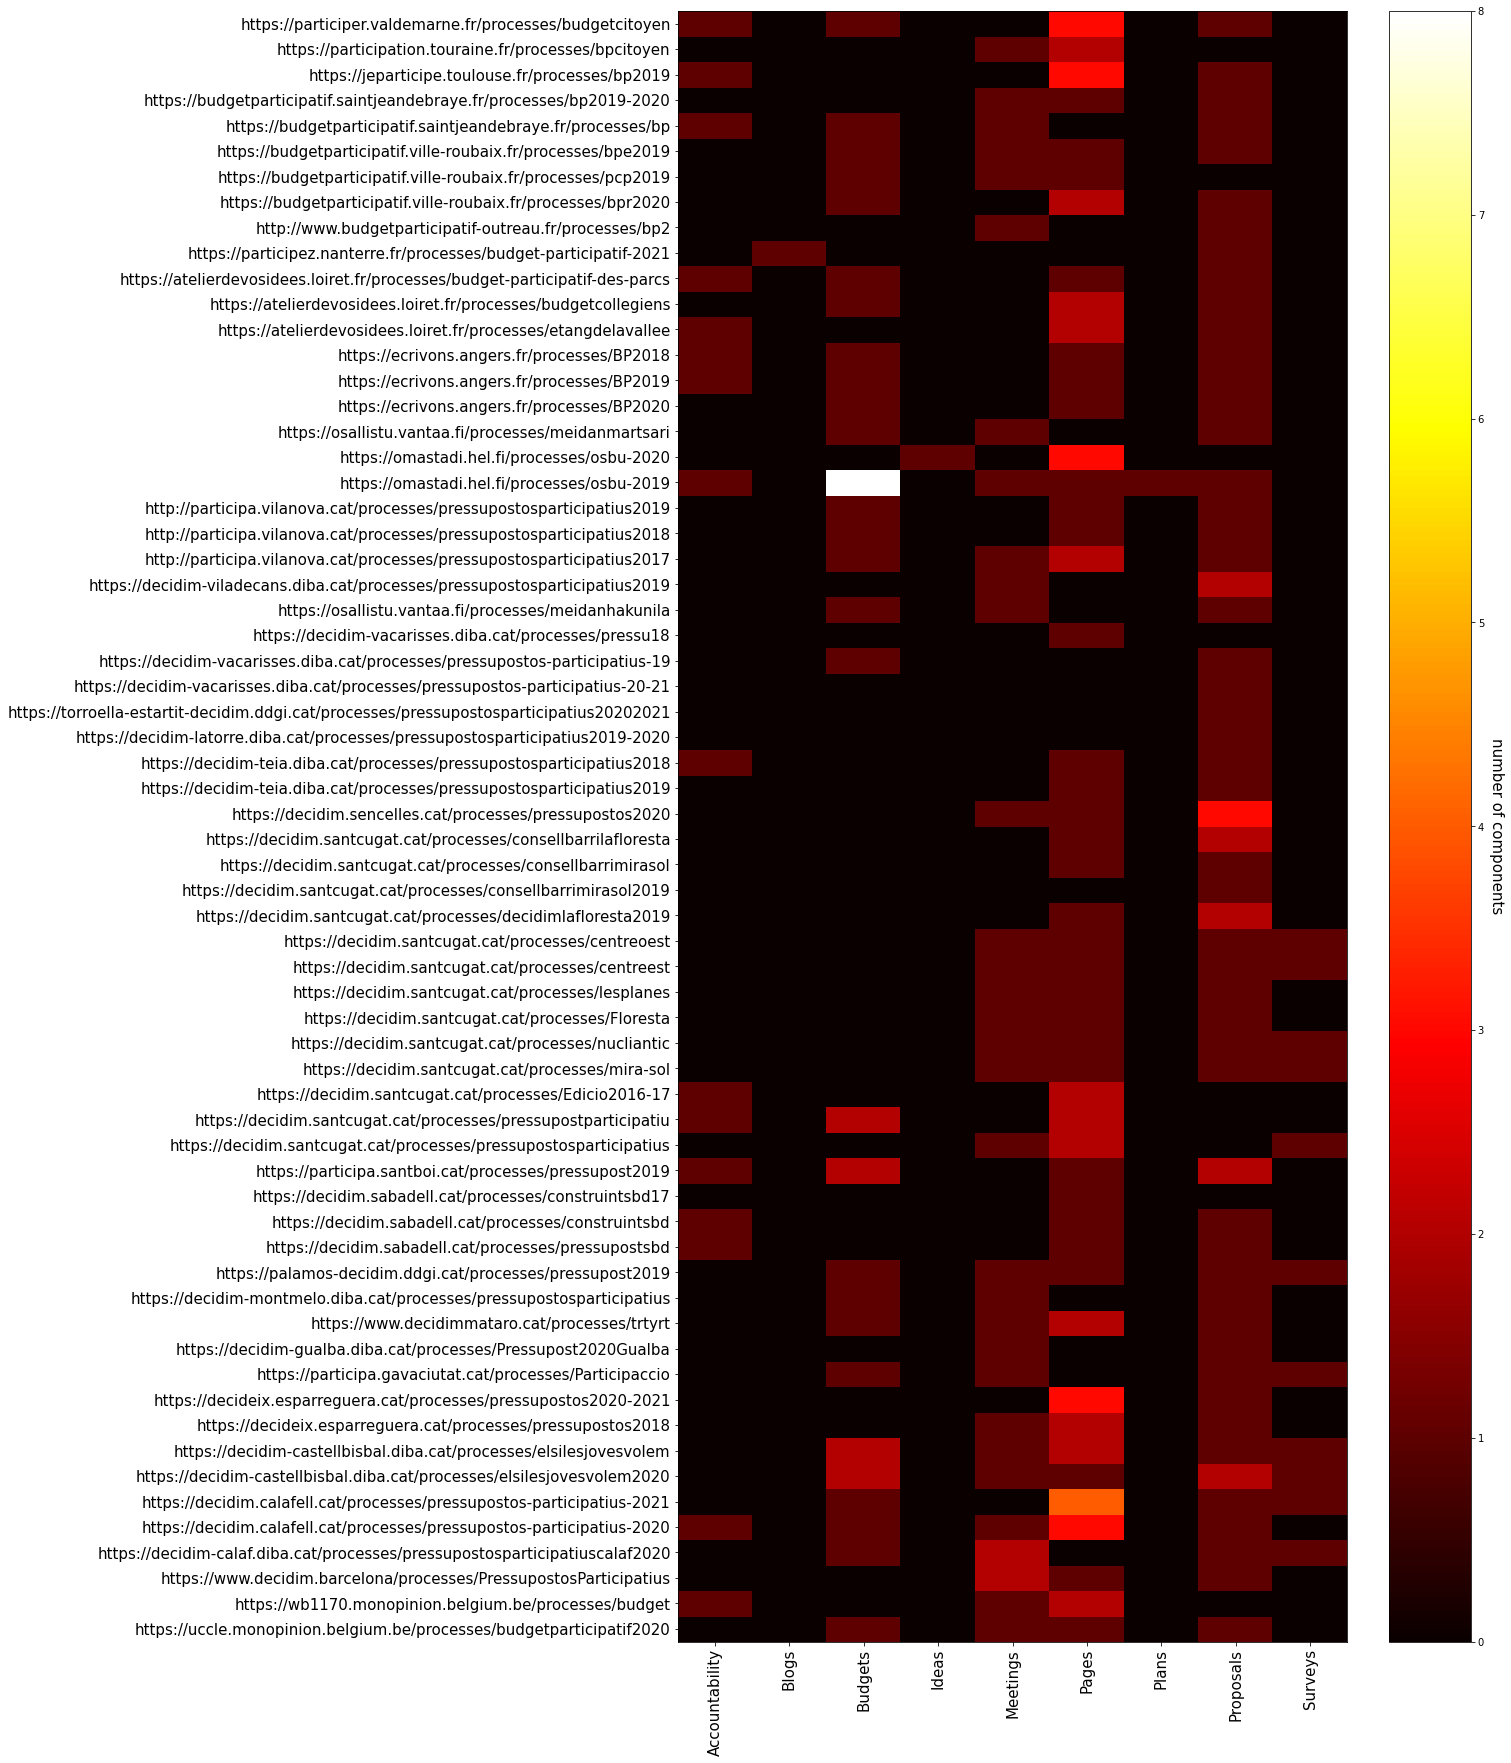

In [3]:
df = pd.read_csv('decidimpb.csv',sep='\t')
processes = df[['PB process url','PB process id']].values

decidim_components = ['Accountability','Blogs','Budgets','Ideas','Meetings','Pages','Plans','Proposals','Surveys']
instances_components = {}

for process in processes:
    id = str(int(process[1]))
    host = process[0].split('/processes/')[0]
    process_name = process[0].split('/processes/')[1]
    parsed_uri = urlparse(host)
    #print ('processes/'+ '{uri.netloc}'.format(uri=parsed_uri).replace('.','_')+'__'+process+'.json')
    try:
        with open('processes/'+ '{uri.netloc}'.format(uri=parsed_uri).replace('.','_')+'__'+process_name+'.json') as json_file:
            data = json.load(json_file)
            process_components = (data['data']['participatoryProcess']['components'])
            for component in decidim_components: 
                instances_components[(process[0],component)] = 0
            for component in process_components: 
                typename = component['__typename']
                if 'Component'== typename:
                    typename = undefined_components[process[0]+'/f/'+component['id']]

                if typename != '':
                    instances_components[(process[0],typename)] = instances_components[(process[0],typename)]+1
    except:
        print('error','processes/'+ '{uri.netloc}'.format(uri=parsed_uri).replace('.','_')+'__'+process_name+'.json')
        


with open('components/components.csv', mode='w') as component_file:
    component_writer = csv.writer(component_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    component_writer.writerow(['process']+decidim_components)        
    for process in processes:        
            try:
                component_writer.writerow(
                    [process[0]] + [instances_components[(process[0],component)] for component in decidim_components])
            except:
                pass
            
        
df = pd.read_csv('components/components.csv', index_col=[0])
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
heatmap = ax.pcolor(df.values, cmap=plt.cm.hot)
fig.set_size_inches(15, 30)
ax.set_xticks(np.arange(len(decidim_components)) + 0.5, minor=False)
ax.set_yticks(np.arange(len(df.index.values.tolist())) + 0.5, minor=False)
ax.set_yticklabels(df.index.values.tolist())
ax.set_xticklabels(decidim_components)
plt.xticks(rotation=90)
cbar = plt.colorbar(heatmap)
cbar.set_label('number of components', rotation=270, labelpad=20, fontsize=15)    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
plt.show()
#fig.savefig('img/heatmap_lang_country.pdf', format='pdf')                    

<AxesSubplot:>

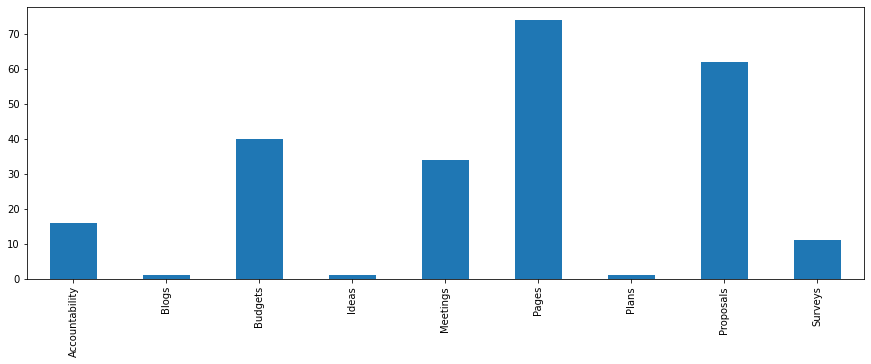

In [4]:
df.sum(axis=0).plot(kind="bar", figsize=(15,5))

<AxesSubplot:xlabel='process'>

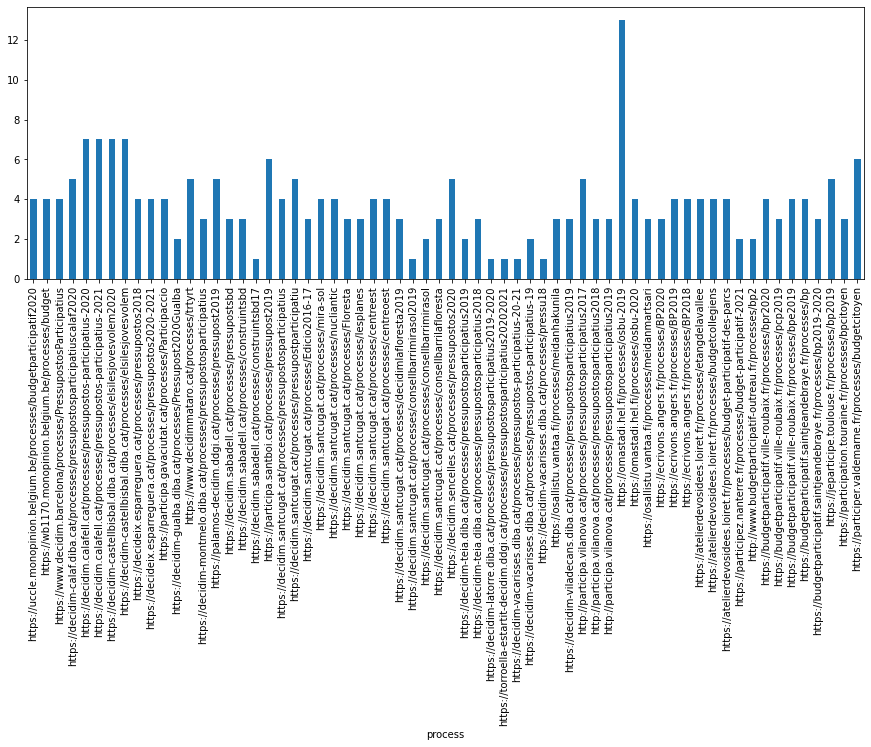

In [5]:
df.sum(axis=1).plot(kind="bar", figsize=(15,5))

In [6]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Accountability,Blogs,Budgets,Ideas,Meetings,Pages,Plans,Proposals,Surveys
Accountability,1.000000,-0.072739,0.259828,-0.072739,-0.290929,0.254316,0.218218,-0.102240,-0.263025
Blogs,-0.072739,1.000000,-0.070874,-0.015873,-0.119918,-0.157951,-0.015873,0.007437,-0.057397
Budgets,0.259828,-0.070874,1.000000,-0.070874,0.119686,0.026686,0.836312,0.059771,0.041937
Ideas,-0.072739,-0.015873,-0.070874,1.000000,-0.119918,0.251868,-0.015873,-0.230542,-0.057397
Meetings,-0.290929,-0.119918,0.119686,-0.119918,1.000000,-0.191609,0.105810,0.056184,0.382608
Pages,0.254316,-0.157951,0.026686,0.251868,-0.191609,1.000000,-0.021345,-0.246011,0.057536
Plans,0.218218,-0.015873,0.836312,-0.015873,0.105810,-0.021345,1.000000,0.007437,-0.057397
Proposals,-0.102240,0.007437,0.059771,-0.230542,0.056184,-0.246011,0.007437,1.000000,0.026892
Surveys,-0.263025,-0.057397,0.041937,-0.057397,0.382608,0.057536,-0.057397,0.026892,1.000000


# Clustering

In [7]:
std = StandardScaler().fit_transform(df) # normalizing the data 
pca = PCA(n_components=len(decidim_components))
principalComponents = pca.fit_transform(std)

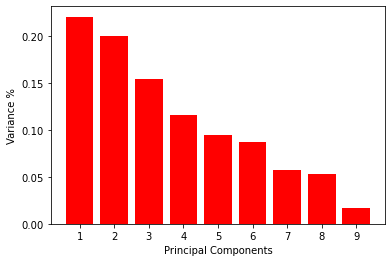

In [8]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

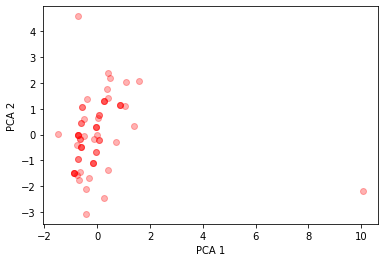

In [9]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

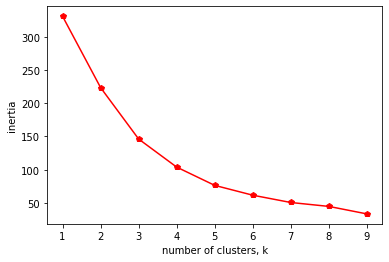

In [10]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

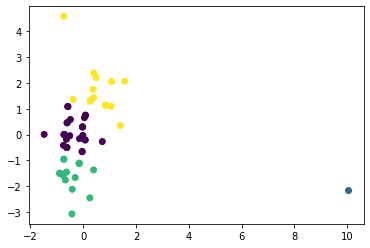

In [11]:
n_clusters=4
model = KMeans(n_clusters)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [12]:
process_names = df.index.values.tolist()
for c in range(n_clusters):
    print('\nCluster',c)
    indices = list(np.where(labels == c)[0])
    for i in indices:
        print(process_names[i])


Cluster 0
https://uccle.monopinion.belgium.be/processes/budgetparticipatif2020
https://decidim.calafell.cat/processes/pressupostos-participatius-2021
https://decideix.esparreguera.cat/processes/pressupostos2018
https://www.decidimmataro.cat/processes/trtyrt
https://decidim.sabadell.cat/processes/construintsbd17
https://decidim.santcugat.cat/processes/pressupostosparticipatius
https://decidim.santcugat.cat/processes/Floresta
https://decidim.santcugat.cat/processes/lesplanes
https://decidim.santcugat.cat/processes/decidimlafloresta2019
https://decidim.santcugat.cat/processes/consellbarrimirasol2019
https://decidim.santcugat.cat/processes/consellbarrimirasol
https://decidim.santcugat.cat/processes/consellbarrilafloresta
https://decidim-teia.diba.cat/processes/pressupostosparticipatius2019
https://decidim-latorre.diba.cat/processes/pressupostosparticipatius2019-2020
https://torroella-estartit-decidim.ddgi.cat/processes/pressupostosparticipatius20202021
https://decidim-vacarisses.diba.cat/

# Clustering without Omastadi

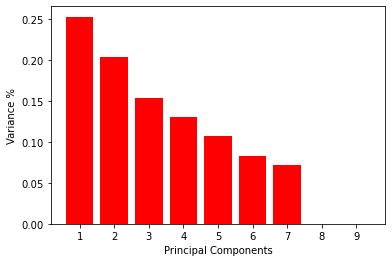

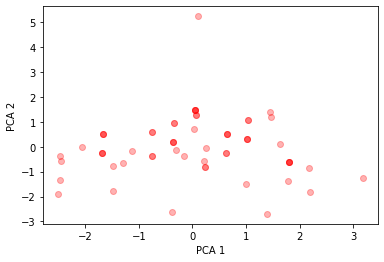

In [16]:
std = StandardScaler().fit_transform(df.drop([
    'https://omastadi.hel.fi/processes/osbu-2019',
    'https://omastadi.hel.fi/processes/osbu-2020'
]))
pca = PCA(n_components=len(decidim_components))
principalComponents = pca.fit_transform(std)

# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()